<a href="https://colab.research.google.com/github/filladani/Machine-Learning_2024/blob/main/JS4_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Praktikum 1

wajib dikerjakan prak 1,2,5 dan tugas 2

In [ ]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

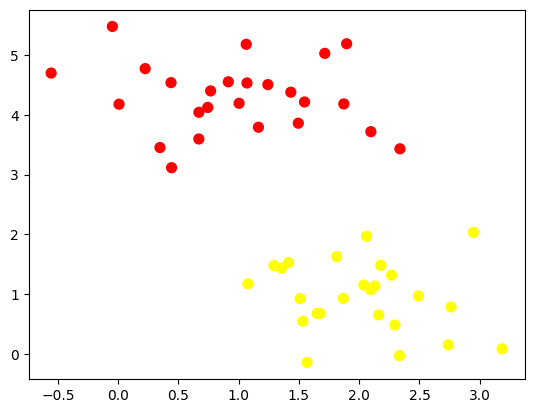

In [ ]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

(-1.0, 3.5)

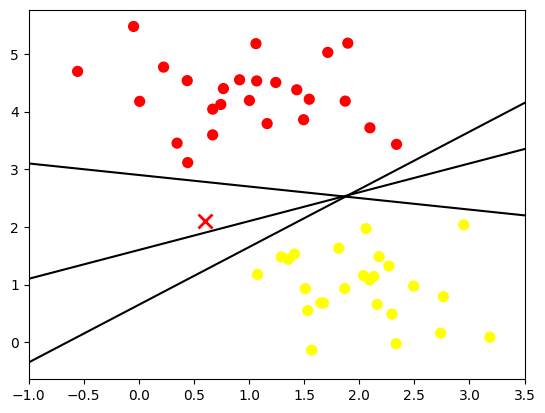

In [ ]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5)

(-1.0, 3.5)

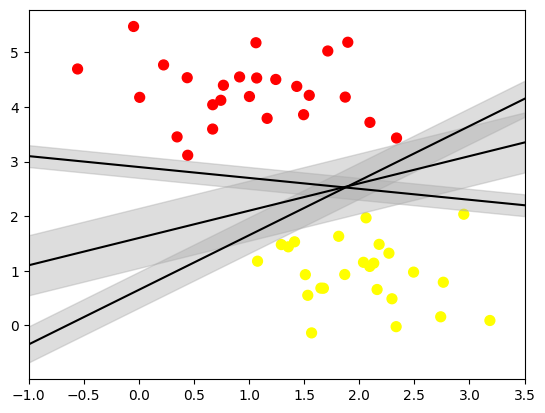

In [ ]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5)

### Penerapan fitting SVM

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

In [ ]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

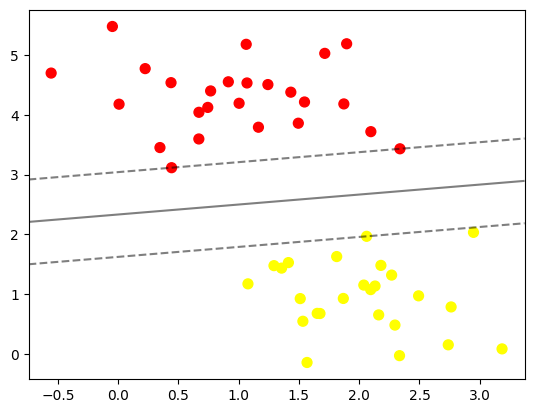

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)

In [ ]:
# untuk mengetahui data yang masuk ke dalam support vector dapat dilakukan dengan memanggil support_vectors_

model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

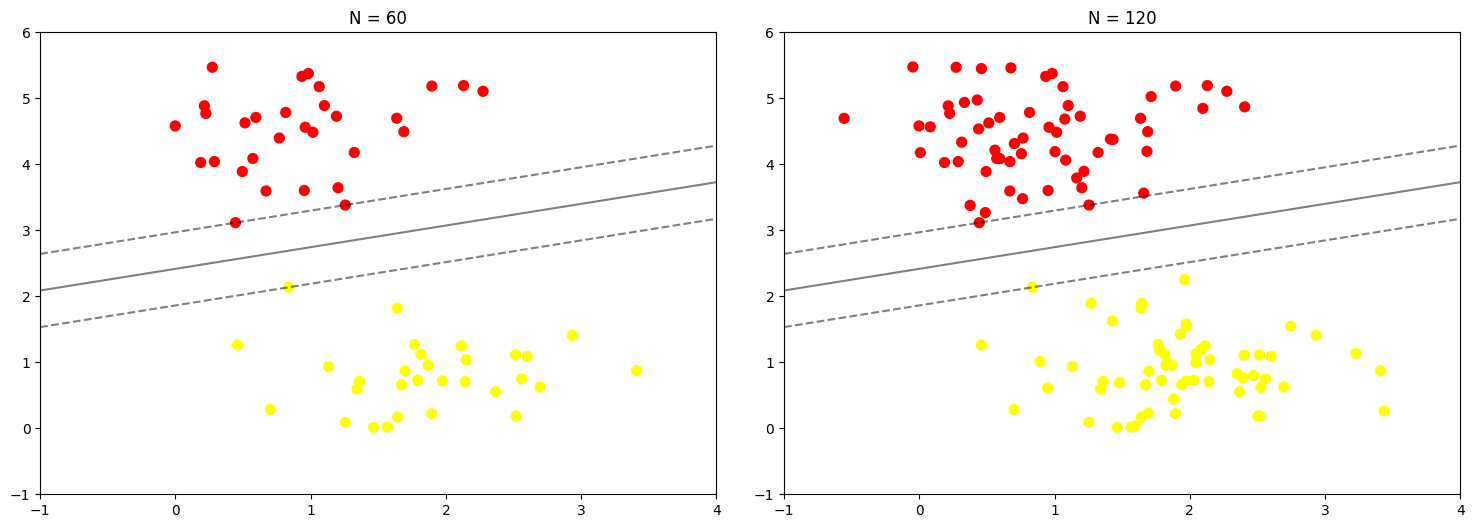

In [ ]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)

    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

### Data Tidak Terpisah Secara Linier

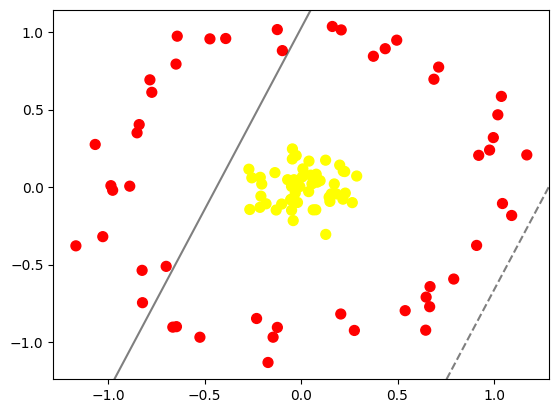

In [ ]:
# contoh data tidak terpisah secara linier

from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

In [ ]:
r = np.exp(-(X ** 2).sum(1))

In [ ]:
!pip install ipywidgets

  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)


interactive(children=(Dropdown(description='elev', index=2, options=(-90, 45, 30, 20, 10), value=30), IntSlide…

<function __main__.plot_3D(elev=30, azim=30, X=array([[ 0.20790108,  1.0148366 ],
       [ 0.21851862,  0.10317076],
       [ 0.64834384, -0.71012603],
       [-0.12941156, -0.14767897],
       [-0.21182993,  0.06332193],
       [ 0.12768764, -0.30526543],
       [-0.47291848,  0.95709526],
       [ 0.49580066,  0.94865449],
       [ 0.17195638,  0.02048556],
       [ 0.0759892 , -0.14620051],
       [ 0.16186716,  1.03703704],
       [-0.06978603,  0.04782617],
       [ 0.9773583 ,  0.23913322],
       [ 0.21672995, -0.07769929],
       [-0.10087569, -0.10918565],
       [ 0.09839206,  0.04167515],
       [ 0.04070091,  0.16803683],
       [ 0.00585123,  0.06627445],
       [ 0.20563001, -0.81906184],
       [-0.02562109,  0.20399645],
       [ 0.68862853,  0.69647895],
       [ 0.22906011, -0.03864541],
       [-0.20859114, -0.05838975],
       [-0.03031917, -0.03799573],
       [-0.97732024, -0.02016875],
       [-0.0066188 ,  0.00374179],
       [-0.64872517,  0.79419307],
       [-0.23094167, -0.84801337],
       [ 0.53961661, -0.79741409],
       [-0.25562146,  0.06003078],
       [ 0.0781904 ,  0.08340181],
       [ 0.20011624,  0.14218844],
       [-0.64245516,  0.97434521],
       [-0.17165167, -1.13195373],
       [ 0.14914718, -0.09222054],
       [-0.05280051, -0.07882411],
       [ 0.7132406 ,  0.77491696],
       [-0.88866779,  0.0060654 ],
       [-0.0188524 , -0.09895016],
       [-0.69974441, -0.51150689],
       [-0.04973229,  0.00463728],
       [-0.64653637, -0.90080147],
       [-0.78421315,  0.69259014],
       [-0.98634882,  0.0093944 ],
       [-0.85080078,  0.35062885],
       [-0.04514849,  0.24671843],
       [-0.82257034, -0.74599492],
       [-0.14537459, -0.96880165],
       [ 0.15651506, -0.04350419],
       [-0.04559666,  0.18170159],
       [ 1.02009486,  0.46689222],
       [-1.02853576, -0.31968209],
       [ 1.17033058,  0.20788491],
       [ 0.26526363, -0.10004064],
       [ 0.00913727,  0.11771216],
       [-0.1235435 ,  1.01703209],
       [ 0.66851697, -0.64212759],
       [ 1.04416797, -0.10586803],
       [ 0.91004779, -0.3762912 ],
       [ 0.37481192,  0.84477444],
       [-0.52484234, -0.96894548],
       [-0.2041949 ,  0.01983158],
       [ 0.05619303,  0.02099906],
       [-0.27087143,  0.11573635],
       [-0.21337312, -0.13048112],
       [-0.77427921,  0.61206703],
       [-0.09730496,  0.88122606],
       [ 0.14526292, -0.06453879],
       [-0.82460503, -0.53722739],
       [ 0.07617592,  0.07030579],
       [ 0.66660466, -0.77205431],
       [-0.05388685, -0.08189735],
       [ 0.12697915,  0.17394749],
       [ 0.06255285, -0.14660655],
       [-0.0494222 , -0.14899183],
       [-0.39099261,  0.95934497],
       [-0.135821  ,  0.09359709],
       [ 0.27613523, -0.92519356],
       [ 0.99671966,  0.31974637],
       [ 0.08308923,  0.03203304],
       [ 0.18288012, -0.04392158],
       [-0.83975811,  0.40368306],
       [-0.04105314, -0.21603173],
       [-0.12317712, -0.90552806],
       [ 1.03844572,  0.58569411],
       [ 0.28820664,  0.07160197],
       [-0.66539439, -0.90383568],
       [-1.06785091,  0.27540862],
       [-1.16797615, -0.37899581],
       [ 0.79138809, -0.59338897],
       [ 0.04938554,  0.07721624],
       [ 0.92096561,  0.20522155],
       [ 0.64603432, -0.92350873],
       [ 0.22602732,  0.10057512],
       [-0.18189197, -0.10765478],
       [-0.03695003,  0.04771603],
       [ 0.43617358,  0.89364508],
       [ 1.09184664, -0.1830378 ],
       [ 0.03910004, -0.02894111],
       [-0.26619414, -0.14434103]]), y=array([0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1]))>

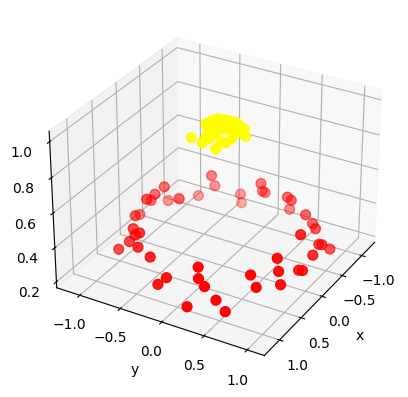

In [ ]:
from mpl_toolkits import mplot3d
from ipywidgets import interact, fixed

# Mendefinisikan fungsi plot_3D
def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d') #Membuat subplot 3D
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim) #Mengatur sudut pandang plot 3D

    # Memberi label sumbu x,y,z
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

# Mmebuat antarmuka interaktif
interact(plot_3D, elev=[-90, 45, 30, 20 , 10], azim=(-180, 180), X=fixed(X), y=fixed(y))

# Praktikum 2

In [ ]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(len(faces.target_names))
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
8
(1348, 62, 47)


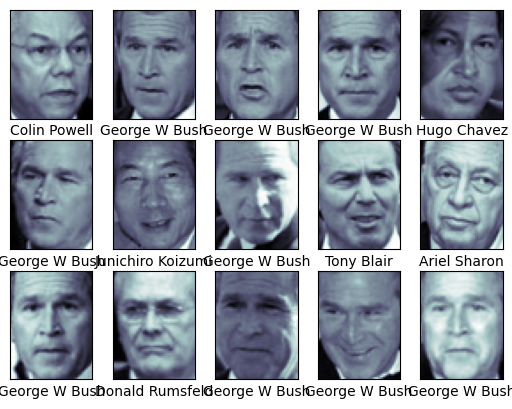

In [ ]:
# contoh wajah yang digunakan

fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

In [ ]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [ ]:
# pemisahan data training dan data testing

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)
print(grid.best_score_)

CPU times: user 1min 42s, sys: 26.7 s, total: 2min 8s
Wall time: 1min 23s
{'svc__C': 5, 'svc__gamma': 0.001}
0.828893332683022


In [ ]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

Text(0.5, 0.98, 'Predicted Names; Incorrect Labels in Red')

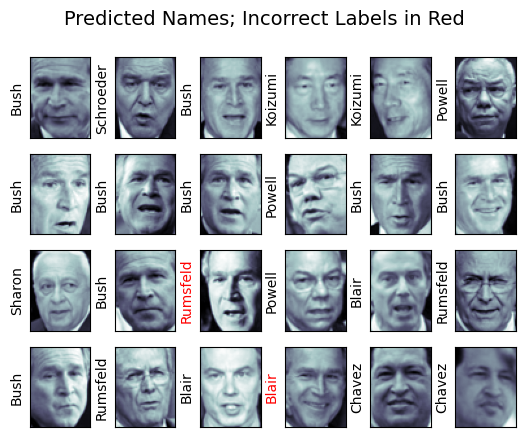

In [ ]:
# hasil label pada data testing

fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.87      0.74        15
     Colin Powell       0.83      0.88      0.86        68
  Donald Rumsfeld       0.70      0.84      0.76        31
    George W Bush       0.97      0.80      0.88       126
Gerhard Schroeder       0.76      0.83      0.79        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.86      1.00      0.92        12
       Tony Blair       0.82      0.98      0.89        42

         accuracy                           0.85       337
        macro avg       0.82      0.86      0.83       337
     weighted avg       0.86      0.85      0.85       337



Text(113.92222222222219, 0.5, 'predicted label')

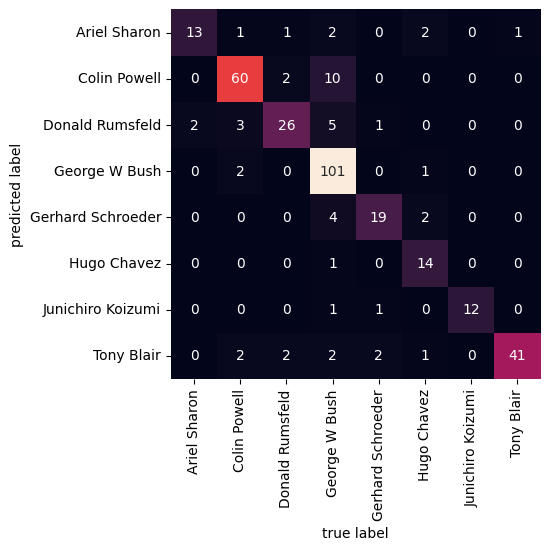

In [ ]:
# bentuk confusion matrix

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

# Praktikum 5

In [1]:
# Import Required Libraries
from pathlib import Path
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import random
import numpy as np
import pandas as pd

In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
# Image directories
train_dir = "/content/drive/MyDrive/Machine Learning_2024/week 4/images/images/test"
test_dir = "/content/drive/MyDrive/Machine Learning_2024/week 4/images/images/test"

### Langkah 1 - Load Data dan Visualisasikan

In [37]:
def load_dataset(img_dir):
    p = Path(img_dir)
    dirs = p.glob('*')

    img_list = []

    for dir in dirs:
        label = str(dir).split('/')[-1]
        for file in dir.glob('*.jpg'):
            img = mpimg.imread(file)

            if not img is None:
                img_list.append((img, label))

    return img_list

In [38]:
# Load training data
train_img = load_dataset(train_dir)

In [39]:
# Check the first data
# It should be a tuple consist of arrays of image and image labels
train_img[0]

(array([[[ 62,  46,  33],
         [ 62,  46,  33],
         [ 62,  46,  33],
         ...,
         [ 63,  44,  30],
         [ 63,  44,  30],
         [ 63,  44,  30]],
 
        [[ 62,  46,  33],
         [ 62,  46,  33],
         [ 62,  46,  33],
         ...,
         [ 63,  44,  30],
         [ 63,  44,  30],
         [ 63,  44,  30]],
 
        [[ 62,  46,  33],
         [ 62,  46,  33],
         [ 62,  46,  33],
         ...,
         [ 63,  44,  30],
         [ 63,  44,  30],
         [ 63,  44,  30]],
 
        ...,
 
        [[190, 134,  83],
         [153, 102,  55],
         [147, 108,  69],
         ...,
         [112,  60,  20],
         [112,  60,  20],
         [112,  60,  20]],
 
        [[180, 129,  82],
         [191, 148, 105],
         [164, 131,  96],
         ...,
         [112,  60,  20],
         [112,  60,  20],
         [113,  61,  21]],
 
        [[210, 163, 117],
         [238, 196, 154],
         [204, 175, 143],
         ...,
         [112,  60,  20],
  

In [40]:
# Random size checking
pick_random = np.random.randint(0, len(train_img))

# Check img size
print(f'Image {pick_random}')
print(train_img[pick_random][0].shape)

Image 52
(593, 800, 3)


In [41]:
# Function to Visualize
def random_img_viz(img_list):
    rand_num = np.random.randint(0, len(img_list))

    img = img_list[rand_num][0]
    label = img_list[rand_num][1]
    label_str = 'day' if label == 1 else 'night'

    plt.imshow(img)
    print(f'Shape\t: {img.shape}')
    print(f'Label\t: {label}')

Shape	: (372, 640, 3)
Label	: night


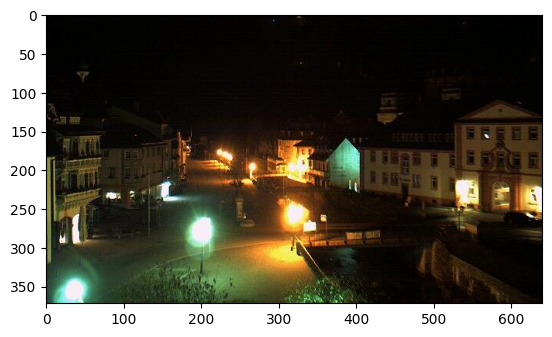

In [42]:
random_img_viz(train_img)

### Langkah 3 - Pra Pengolahan Data

In [43]:
def standarized_input(image):
    # resize to w: 1100, h:600
    std_img = cv2.resize(image, (1100,600))

    return std_img

In [44]:
def label_encoder(label):
    # Encode the label
    # day as 1; night as 0
    num_val = 0

    if(label == 'day'):
        num_val = 1

    return num_val

In [45]:
def preprocess(img_list):
    std_img_list = []

    for item in img_list:
        image = item[0]
        label = item[1]

        # Standarized the image
        std_img = standarized_input(image)

        # Create the label
        img_label = label_encoder(label)

        std_img_list.append((std_img, img_label))

    return std_img_list

In [46]:
train_std_img_list = preprocess(train_img)

In [47]:
# Random size checking
pick_random = np.random.randint(0, len(train_std_img_list))

# Check img size
print(f'Image {pick_random}')
print(train_std_img_list[pick_random][0].shape)

Image 76
(600, 1100, 3)


Shape	: (600, 1100, 3)
Label	: 0


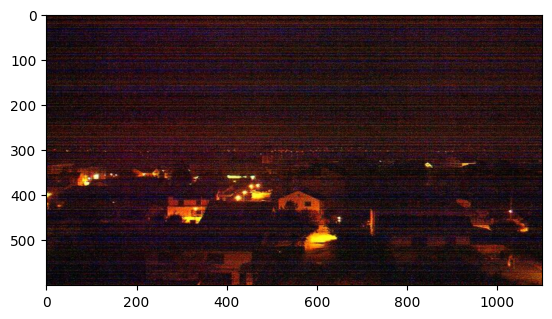

In [48]:
random_img_viz(train_std_img_list)

### Langkah 4 - Ekstraksi Fitur

In [49]:
# Get feature based on average brightness using HSV colorspace
def avg_brightness(image):
    # Convert image to HSV
    img_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    # Calculate the avg of brightness
    sum_brightness = np.sum(img_hsv[:,:,2]) # take the 3rb value which is the V channel
    area = image.shape[0] * image.shape[1]
    avg = sum_brightness / area

    return avg

Image 136
Avg Brighness: 149.4416


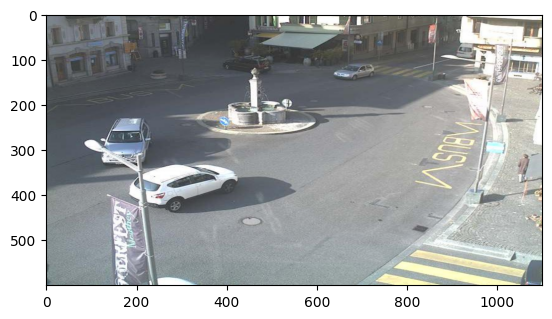

In [50]:
# Check on random image
rand_img = np.random.randint(0, len(train_std_img_list))

feature_img = train_std_img_list[rand_img][0]

avg_img = avg_brightness(feature_img)

print(f'Image {rand_img}')
print(f'Avg Brighness: {avg_img:.4f}')
plt.imshow(feature_img)

### Langkah 5 - Klasifikasi dengan Metode Threshold

In [51]:
def predict_label(img, threshold):
    # Computer average brightness
    avg = avg_brightness(img)
    pred = 0

    # Predict the label based on user defined threshold
    if avg > threshold:
        pred = 1

    return pred

Image 144
Actual label: 1
Predicted label: 1


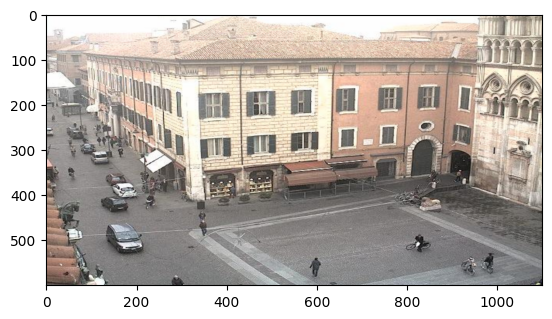

In [52]:
# Test the classifier on train data
rand_img = np.random.randint(0, len(train_std_img_list))

pred = predict_label(train_std_img_list[rand_img][0], threshold=120)

# Evaluate
print(f'Image {rand_img}')
print(f'Actual label: {train_std_img_list[rand_img][1]}')
print(f'Predicted label: {pred}')
plt.imshow(train_std_img_list[rand_img][0])

### Langkah 6 - Evaluasi (Manual)

In [53]:
def evaluate(img_list, threshold):
    miss_labels = []

    for file in img_list:
        # Get the ground truth / correct label
        img = file[0]
        label = file[1]

        # Get prediction
        pred_label = predict_label(img, threshold)

        # Compare ground truth and pred
        if pred_label != label:
            miss_labels.append((img, pred_label, label))

    total_img = len(img_list)
    corr_pred = total_img - len(miss_labels)
    accuracy = corr_pred / total_img

    print(f'Accuracy: {accuracy:.4f}')

In [54]:
# Evaluate on train data
evaluate(train_std_img_list, threshold=120)

Accuracy: 0.8688


In [55]:
# Evaluate on test data

# Load test data
test_img = load_dataset(test_dir)

# Preprocess
test_std_img_list = preprocess(test_img)

# Predict
evaluate(test_std_img_list, threshold=120)

Accuracy: 0.8688


### Langkah 4 alternatif - Membuat Feature Vectors

In [56]:
# Create function to extract feature for every images and stored in tabular data
# Stored in Pandas dataframe
def extract_avg_bright_feature(img_list):
    avg_list = []
    labels = []

    for img in img_list:
        img_avg = avg_brightness(img[0]) # Get the avg brightness from image
        img_label = img[1] # Get the image label

        avg_list.append(img_avg)
        labels.append(img_label)

    # Stack data in columcular way
    data = np.column_stack((avg_list, labels))
    # Create a Pandas dataframe
    df = pd.DataFrame(data, columns=['AVG_BRIGHT', 'LABELS'])

    return df

In [57]:
# Extract feature on train data
train_avg_img = extract_avg_bright_feature(train_std_img_list)
print(f'Shape: {train_avg_img.shape}')
train_avg_img.head()

Shape: (160, 2)


,AVG_BRIGHT,LABELS
0,111.826289,0.0
1,41.211485,0.0
2,38.805955,0.0
3,40.419198,0.0
4,87.100448,0.0


In [60]:
# Do the same thing on test data
test_avg_img = extract_avg_bright_feature(test_std_img_list)
print(f'Shape: {test_avg_img.shape}')
test_avg_img.head()

Shape: (160, 2)


,AVG_BRIGHT,LABELS
0,111.826289,0.0
1,41.211485,0.0
2,38.805955,0.0
3,40.419198,0.0
4,87.100448,0.0


### Langkah 5 alternatif

In [61]:
# import requied library
from sklearn.svm import SVC

# Split data and label
X_train = train_avg_img.iloc[:,0].values.reshape(-1,1)
y_train = train_avg_img.iloc[:,1]
X_test = test_avg_img.iloc[:,0].values.reshape(-1,1)
y_test = test_avg_img.iloc[:,1]

model = SVC()
model.fit(X_train, y_train)

SVC()

### Langkah 6 alternatif

In [62]:
from sklearn.metrics import accuracy_score

# Make a prediction on train data
y_train_pred = model.predict(X_train)

# Get the accuracy on train data
acc_train = accuracy_score(y_train, y_train_pred)

# Make a prediction on test data
y_test_pred = model.predict(X_test)

# Get the accuracy on test data
acc_test = accuracy_score(y_test, y_test_pred)

# Print Eval Result
print(f'Accuracy on train: {acc_train}')
print(f'Accuracy on test: {acc_test}')

Accuracy on train: 0.925
Accuracy on test: 0.925


# Tugas 2

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from pathlib import Path
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

In [64]:
# Image directories
train_dir = "/content/drive/MyDrive/Machine Learning_2024/week 4/images/images/test"
test_dir = "/content/drive/MyDrive/Machine Learning_2024/week 4/images/images/test"

In [65]:
def load_dataset(img_dir):
    p = Path(img_dir)
    dirs = p.glob('*')
    img_list = []
    for dir in dirs:
        label = str(dir).split('/')[-1]
        for file in dir.glob('*.jpg'):
            img = mpimg.imread(file)
            if img is not None:
                img_list.append((img, label))
    print(f"Muat {len(img_list)} gambar dari {img_dir}")  # Baris debug
    return img_list

In [66]:
def extract_histogram_features(image, bins=256):
    if len(image.shape) == 3:
        image = np.mean(image, axis=2)
    hist = np.histogram(image.flatten(), bins=bins, range=[0, 256])[0]
    return hist / np.sum(hist)  # Normalisasi histogram

In [67]:
def prepare_data(data):
    X = np.array([extract_histogram_features(img) for img, _ in data])
    y = np.array([label for _, label in data])

    le = LabelEncoder()
    y = le.fit_transform(y)

    return X, y, le

In [68]:
train_data = load_dataset(train_dir)
test_data = load_dataset(test_dir)

Muat 160 gambar dari /content/drive/MyDrive/Machine Learning_2024/week 4/images/images/test
Muat 160 gambar dari /content/drive/MyDrive/Machine Learning_2024/week 4/images/images/test


In [69]:
X_train, y_train, le = prepare_data(train_data)
X_test, y_test, _ = prepare_data(test_data)

In [70]:
print("Bentuk X_train:", X_train.shape)
print("Bentuk y_train:", y_train.shape)

Bentuk X_train: (160, 256)
Bentuk y_train: (160,)


In [71]:
if X_train.size > 0 and y_train.size > 0:
    svm_model = SVC(kernel='rbf', C=1.0, random_state=50)
    svm_model.fit(X_train, y_train)

In [72]:
y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Skor Akurasi: {accuracy:.4f}")
print("Laporan Klasifikasi:")
print(classification_report(y_test, y_pred, target_names=le.classes_))
print("\nMatriks Kebingungan:")
print(confusion_matrix(y_test, y_pred))

Skor Akurasi: 0.9625
Laporan Klasifikasi:
              precision    recall  f1-score   support

         day       0.96      0.96      0.96        80
       night       0.96      0.96      0.96        80

    accuracy                           0.96       160
   macro avg       0.96      0.96      0.96       160
weighted avg       0.96      0.96      0.96       160


Matriks Kebingungan:
[[77  3]
 [ 3 77]]
